# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Requests
import requests
import json
import time
from pprint import pprint

# Data Science
import pandas as pd
import numpy as np
import scipy.stats as sc

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        if (response.status_code == 200):
            # Extract data
            city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_name = city_weather.get("name")
            city_country = city_weather.get("sys", {}).get("country")
            city_date = city_weather.get("dt")
            city_humidity = city_weather.get("main", {}).get("humidity")
            city_max_temp = city_weather.get("main", {}).get("temp_max")
            city_pressure = city_weather.get("main", {}).get("pressure")
            city_clouds = city_weather.get("clouds", {}).get("all")
            city_wind = city_weather.get("wind", {}).get("speed")
            city_lat = city_weather.get("coord", {}).get("lat")
            city_lng = city_weather.get("coord", {}).get("lon")

        # Append the City information into city_data list
        city_data.append({"City": city_name,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Pressure": city_pressure,
                              "Country": city_country,
                              "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sonsorol village
City not found. Skipping...
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | labrador city
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | anadyr
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | taiohae
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | sur
Processing Record 12 of Set 1 | holualoa
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | murun-kuren
Processing Record 16 of Set 1 | pisco
Processing Record 17 of Set 1 | zemio
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | sangkhla buri
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | port elizabeth
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Pressure      598
Country       598
Date          598
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Yellowknife,62.4560,-114.3525,-19.44,76,20,6.91,1037,CA,1732766201
1,Labrador City,52.9463,-66.9114,31.17,88,100,2.30,1006,CA,1732766743
2,Wailua Homesteads,22.0669,-159.3780,72.12,78,1,12.21,1016,US,1732766489
3,Anadyr,64.7500,177.4833,30.70,86,40,26.84,1023,RU,1732766681
4,Thompson,55.7435,-97.8558,8.76,92,75,2.30,1020,CA,1732766592


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
City_ID,,,,,,,,,,
0,Yellowknife,62.4560,-114.3525,-19.44,76,20,6.91,1037,CA,1732766201
1,Labrador City,52.9463,-66.9114,31.17,88,100,2.30,1006,CA,1732766743
2,Wailua Homesteads,22.0669,-159.3780,72.12,78,1,12.21,1016,US,1732766489
3,Anadyr,64.7500,177.4833,30.70,86,40,26.84,1023,RU,1732766681
4,Thompson,55.7435,-97.8558,8.76,92,75,2.30,1020,CA,1732766592


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

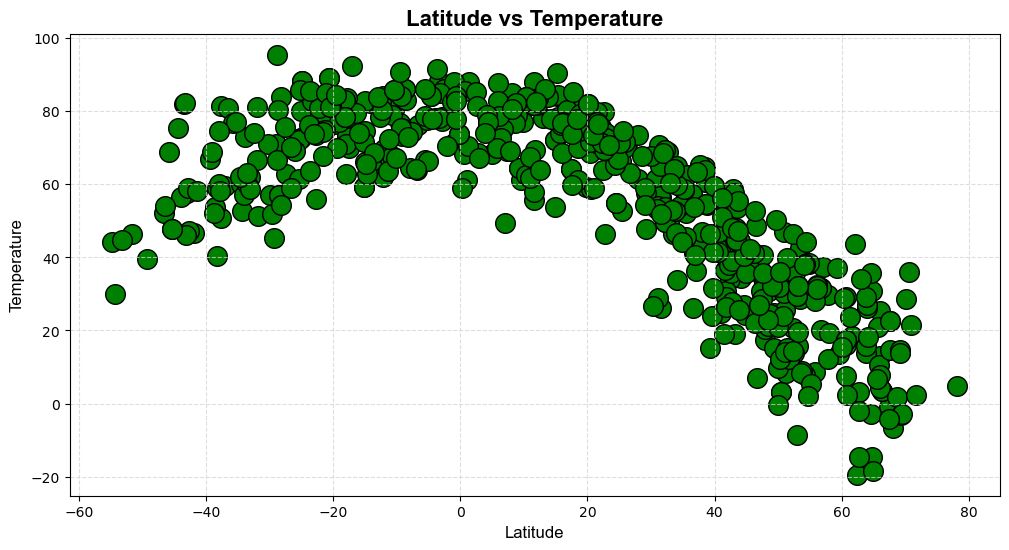

In [11]:
# Build scatter plot for latitude vs. temperature

plt.figure(figsize=(12, 6))

plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], color="green", edgecolor="black", s=200)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

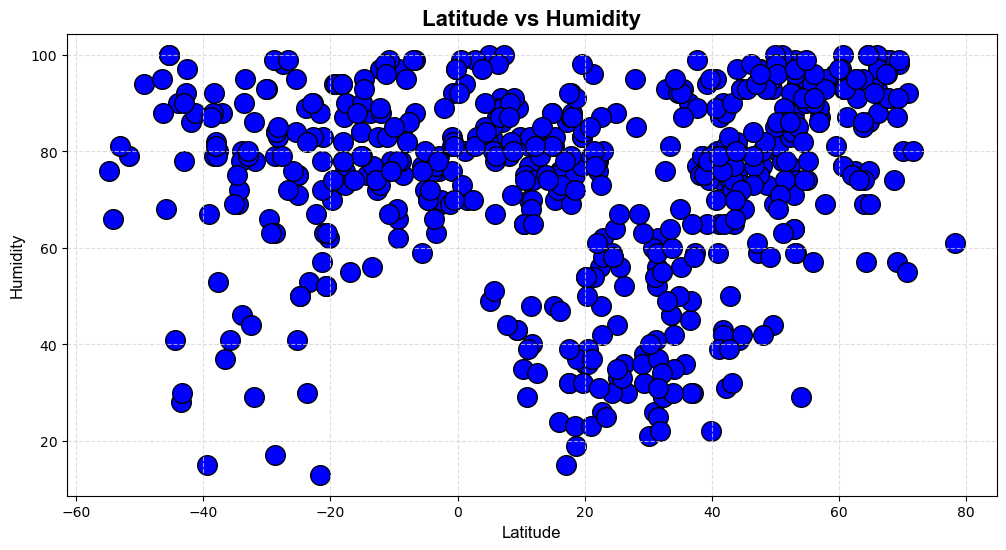

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(12, 6))
plt.scatter(city_data_df.Lat, city_data_df["Humidity"], color="blue", edgecolor="black", s=200)


# Incorporate the other graph properties
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Humidity", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

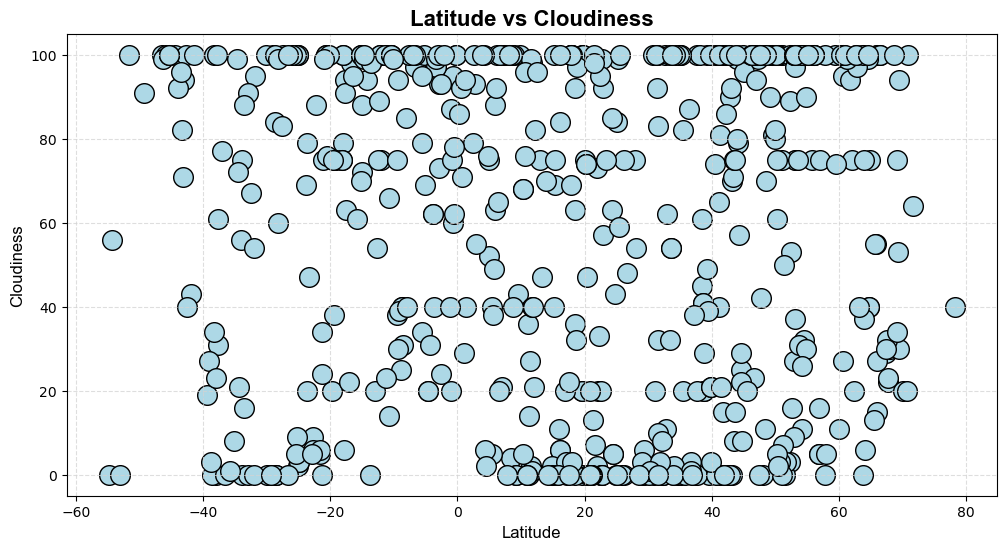

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(12, 6))
plt.scatter(city_data_df.Lat, city_data_df["Cloudiness"], color="lightblue", edgecolor="black", s=200)


# Incorporate the other graph properties
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Cloudiness", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

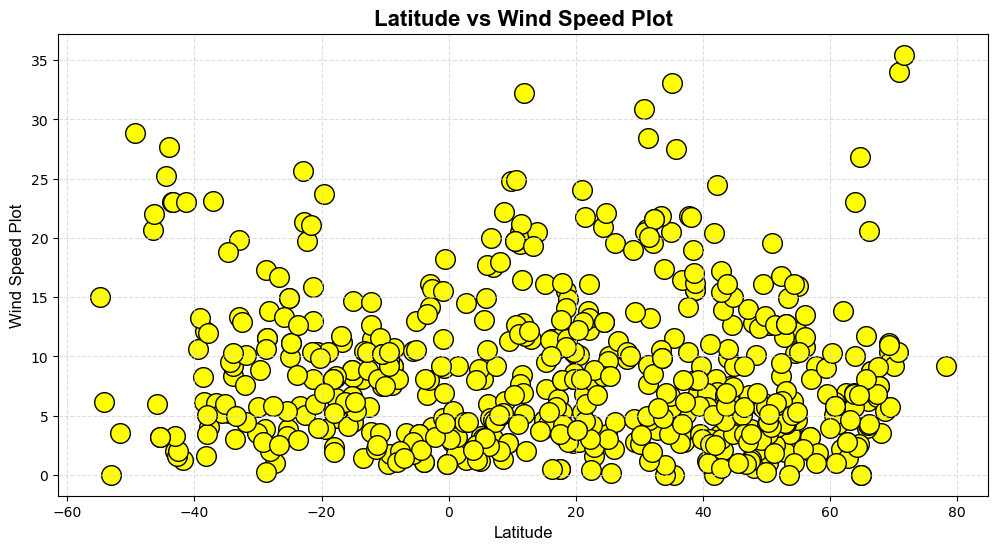

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(12, 6))
plt.scatter(city_data_df.Lat, city_data_df["Wind Speed"], color="yellow", edgecolor="black", s=200)


# Incorporate the other graph properties
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Wind Speed Plot", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Wind Speed Plot", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots

def do_regression_plot(x_values, y_values, x_label, y_label, annotation):  
    # do regression
    (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # these are the points/predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(rvalue)
    print(line_eq)

# Change Canvas Size
    plt.figure(figsize=(12, 6))

# Create a basic plot
    plt.scatter(x_values, y_values, color="blue", edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=6) # the regression line

# Add Labels/Title
    
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    
    # Annotate
    plt.annotate(line_eq, annotation, fontsize=15, color="black")
    
    # Show/Save the Graph
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Yellowknife,62.4560,-114.3525,-19.44,76,20,6.91,1037,CA,1732766201
1,Labrador City,52.9463,-66.9114,31.17,88,100,2.30,1006,CA,1732766743
2,Wailua Homesteads,22.0669,-159.3780,72.12,78,1,12.21,1016,US,1732766489
3,Anadyr,64.7500,177.4833,30.70,86,40,26.84,1023,RU,1732766681
4,Thompson,55.7435,-97.8558,8.76,92,75,2.30,1020,CA,1732766592


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Adamstown,-25.0660,-130.1015,72.68,75,100,14.88,1021,PN,1732766747
1,Adamstown,-25.0660,-130.1015,72.68,75,100,14.88,1021,PN,1732766747
2,Avarua,-21.2078,-159.7750,77.05,83,75,10.36,1013,CK,1732766486
3,Ancud,-41.8697,-73.8203,46.67,86,43,1.25,1018,CL,1732766408
4,Margaret River,-33.9500,115.0667,72.93,46,0,8.34,1018,AU,1732766754


###  Temperature vs. Latitude Linear Regression Plot

-0.8837670854866121
y = -1.18x + 90.15


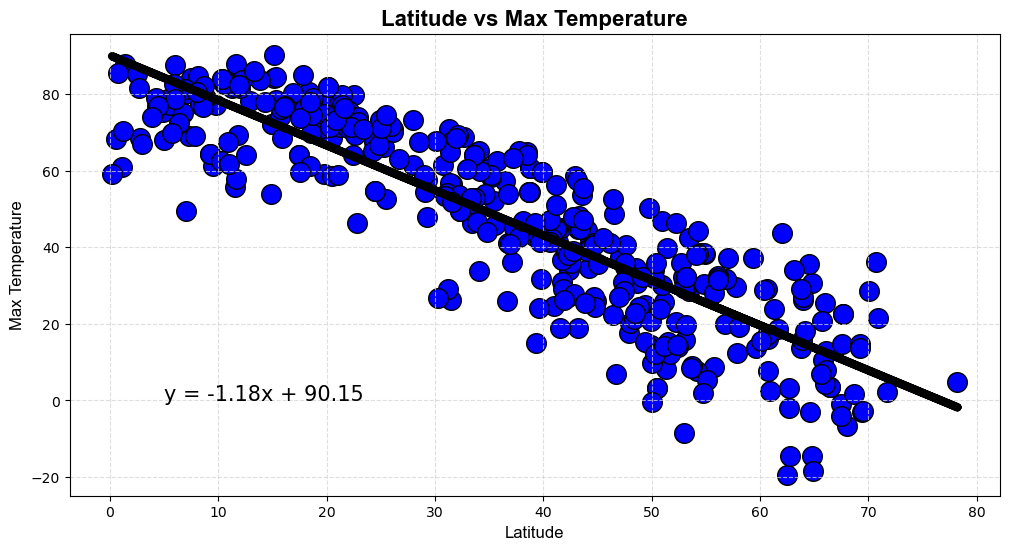

In [28]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.6012921378886986
y = 0.54x + 82.79


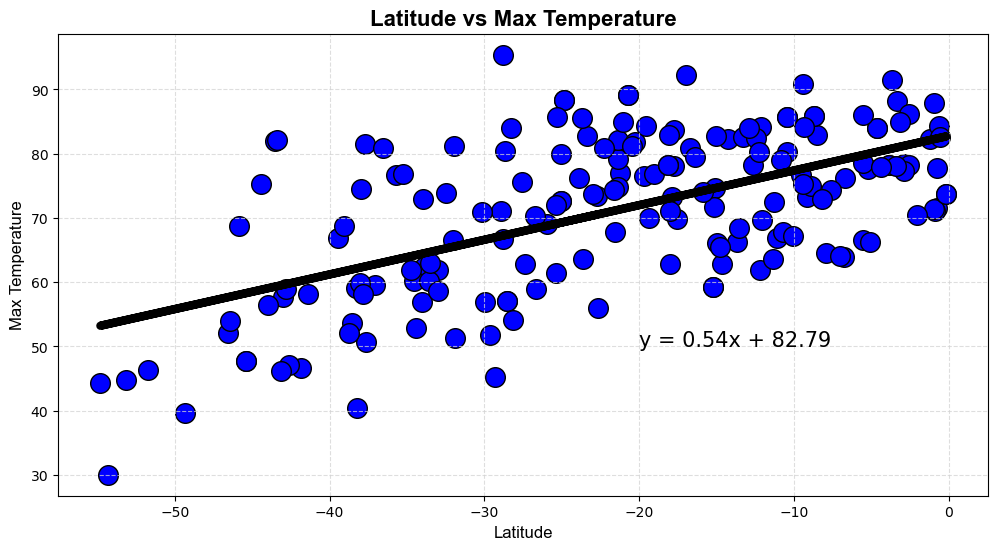

In [29]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (-20, 50)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** 

The first graph shows a negative linear relationship in the Northern Hemisphere, where temperatures decrease as latitude increases further from the equator. 

The second graph shows a positive linear relationship between latitude and maximum temperature in the Southern Hemisphere, indicating that as latitude increases toward the equator, temperatures rise.

These trends match what we expect from the climate, where places closer to the equator are warmer because they get more direct sunlight.



### Humidity vs. Latitude Linear Regression Plot

0.2754024268296762
y = 0.3x + 61.68


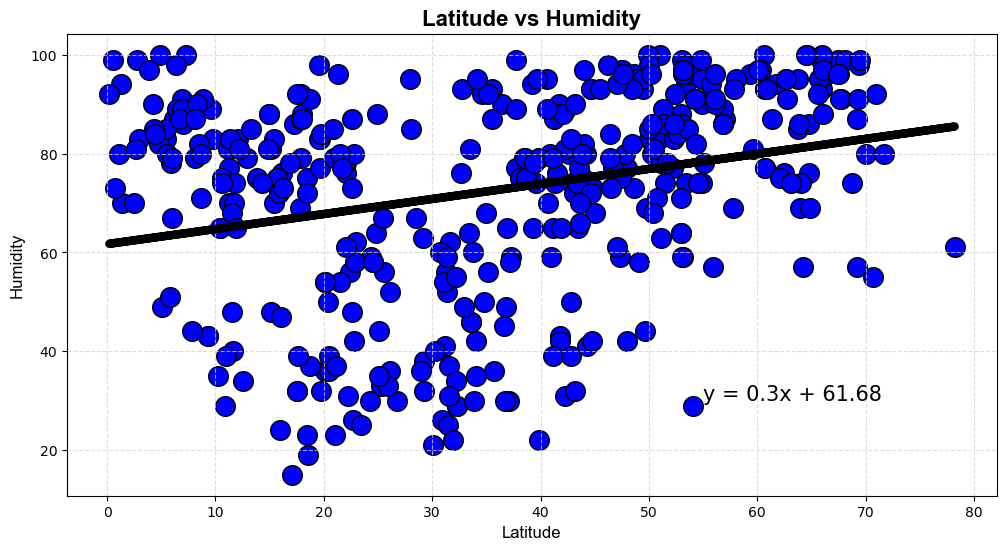

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.12009730444241064
y = 0.15x + 79.61


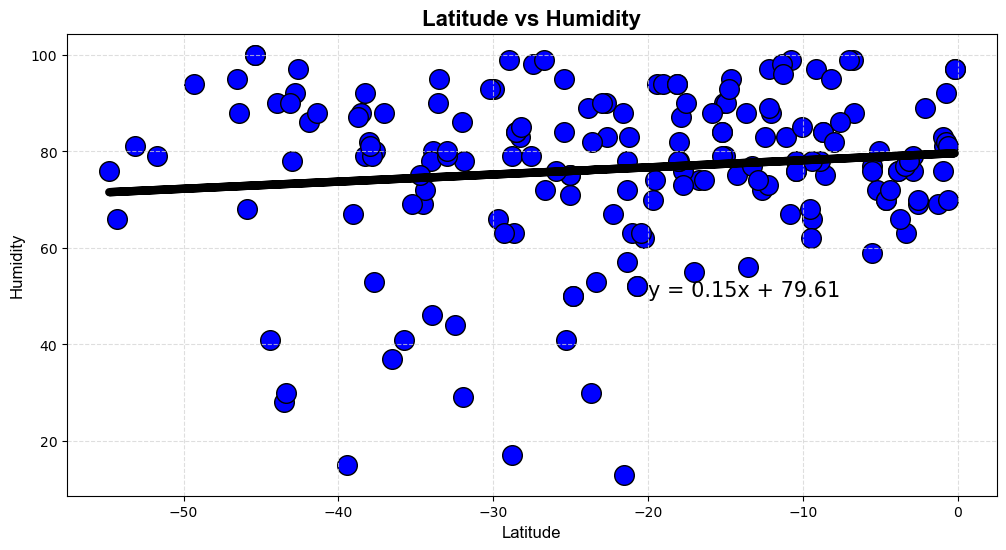

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (-20, 50)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:**  

Both graphs show a weak positive linear relationship between latitude and humidity. In the Northern Hemisphere, the trend line suggests that humidity slightly increases as latitude increases, while in the Southern Hemisphere, the trend is even weaker. Overall, latitude does not have a strong effect on humidity, as indicated by the small slopes.

### Cloudiness vs. Latitude Linear Regression Plot

0.13253619352766352
y = 0.28x + 44.27


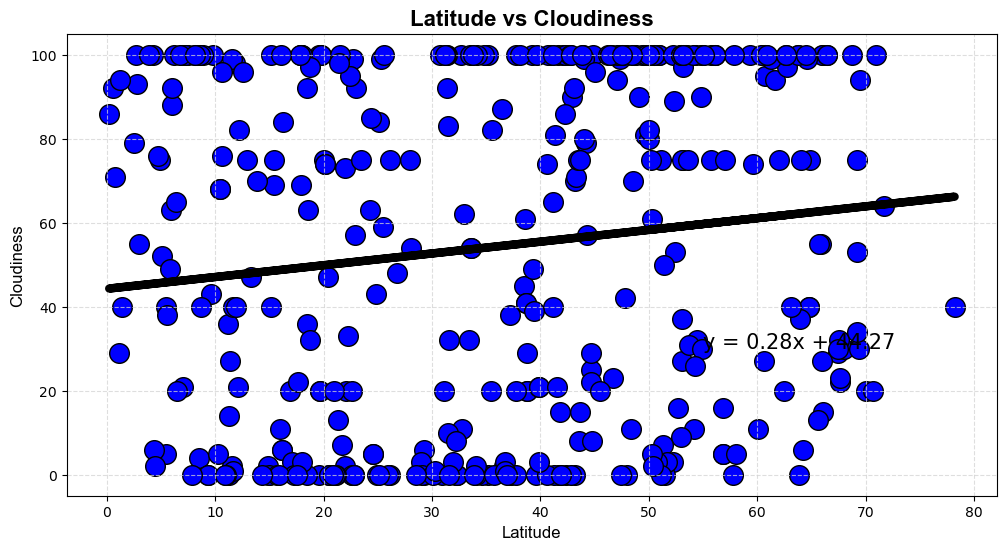

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.1438785997243302
y = 0.39x + 70.57


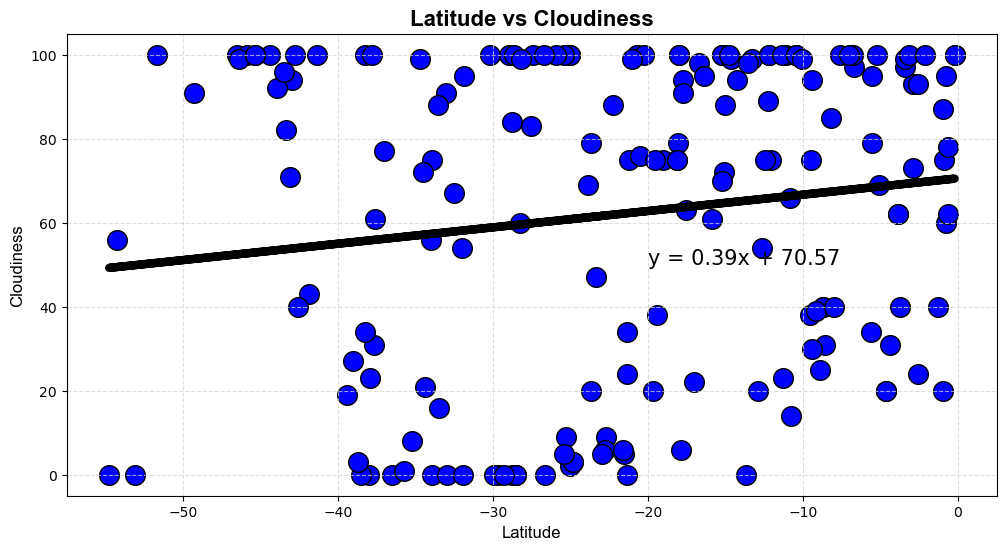

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (-20, 50)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** Both graphs show a weak positive linear relationship between latitude and cloudiness. In the Northern Hemisphere, cloudiness slightly increases with latitude, and in the Southern Hemisphere, a similar small upward trend is observed. However, the scattered data and small slopes suggest a weak association between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

-0.08584944434435078
y = -0.03x + 9.47


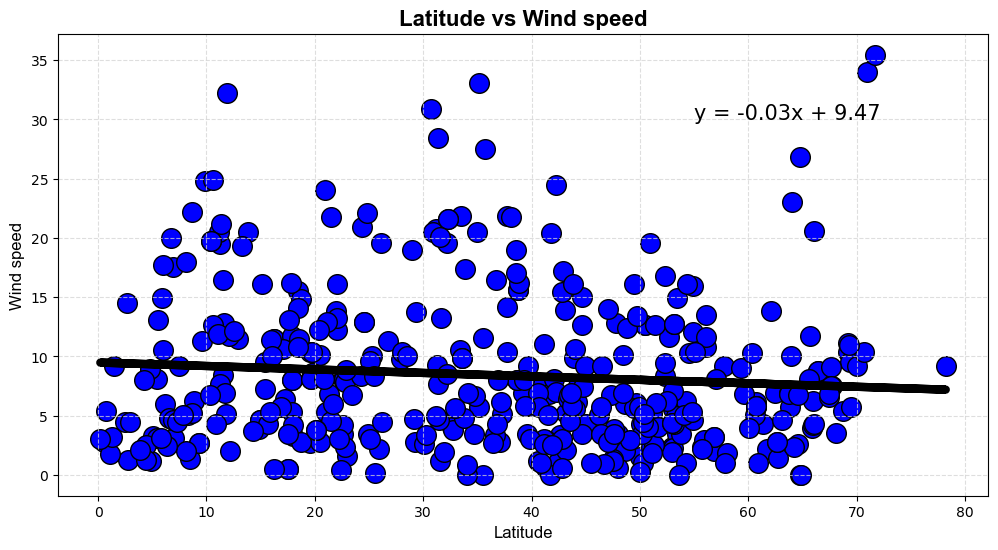

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind speed"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

-0.1963680791374154
y = -0.09x + 6.84


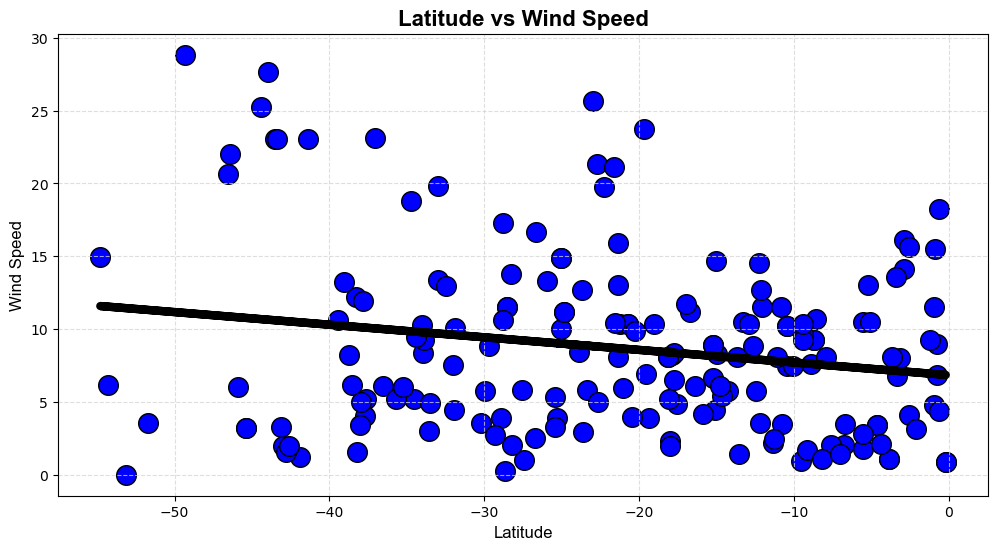

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (-20, 50)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** 

Both graphs show a very weak negative linear relationship between latitude and wind speed. In the Northern Hemisphere, and the Southern Hemisphere, wind speed decreases slightly as latitude increases, but the slopes are very small, indicating a minimal correlation between these variables. Overall, latitude has little to no meaningful effect on wind speed in this data.